In [54]:
import os 
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
import pandas as pd
import tifffile 
from tifffile.tifffile import imread
import cv2 as cv


In [55]:
#establish prefix for files
data_path = '/SNS/VENUS/IPTS-35945/shared/images_normalized/Gd Mask Normalization' 
assert os.path.exists(data_path)

In [56]:
img = imread(data_path+'/normalized_sample_7998_obs_8015/integrated.tif')
img.shape
print (img.shape)

(512, 512)


In [57]:
src = cv.imread(data_path+'/normalized_sample_7998_obs_8015/integrated.tif', cv.IMREAD_UNCHANGED)

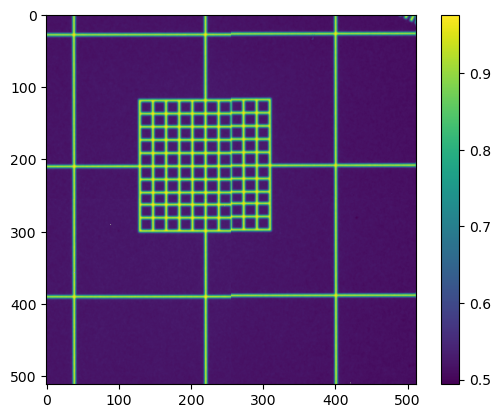

In [58]:
plt.imshow(src)
plt.colorbar()

In [59]:
gray = cv.bitwise_not(src)
cv.normalize(gray, gray, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
gray_8bit =cv.convertScaleAbs(gray)

uint8
(512, 512)


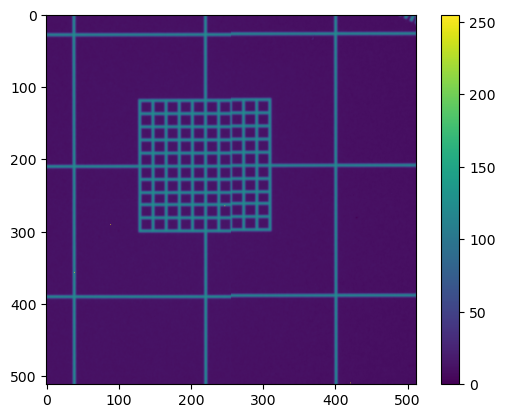

In [60]:
plt.imshow(gray_8bit)
plt.colorbar()
print(gray_8bit.dtype)
print(gray_8bit.shape)


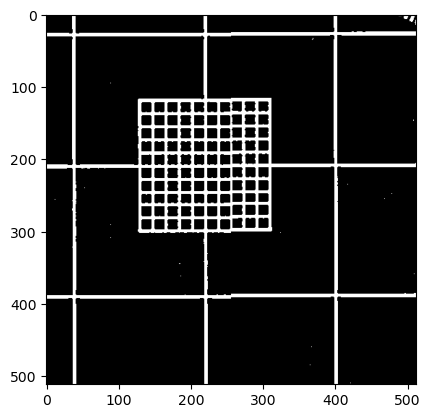

In [61]:
bw = cv.adaptiveThreshold(gray_8bit, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, -2)
plt.imshow(bw, cmap='gray')

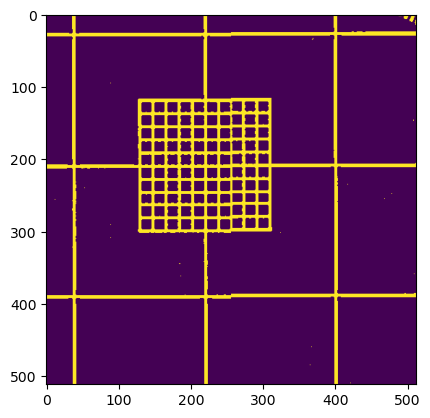

In [62]:
horizontal = np.copy(bw)
plt.imshow(horizontal)

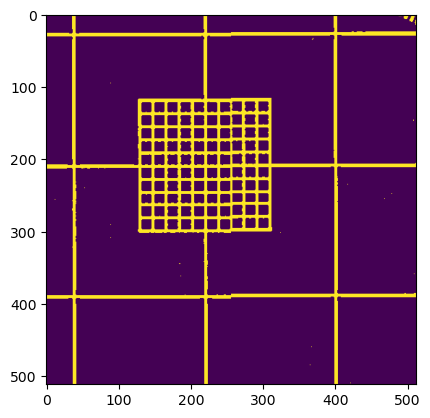

In [63]:
vertical = np.copy(bw)
plt.imshow(vertical)

In [64]:
#selects the horizontal lines and filters out vertical ones, generating an image without vertical lines
cols = horizontal.shape[1]
horizontal_size = cols // 30

In [65]:
horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size,1))


In [66]:
horizontal = cv.erode(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)

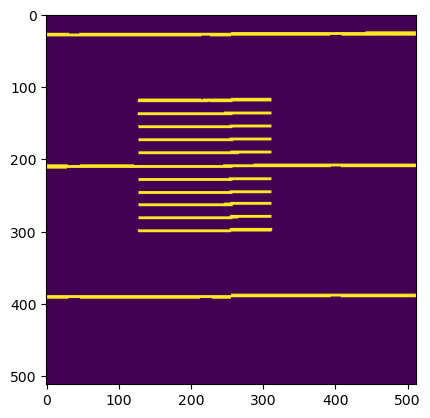

In [67]:
plt.imshow(horizontal)

In [68]:
#does not do this to the horizontal so that it has an inverse image of one side and can thus more easily identify overlap 
'''horizontal = cv.bitwise_not(horizontal)
plt.imshow(horizontal)'''

'horizontal = cv.bitwise_not(horizontal)\nplt.imshow(horizontal)'

In [69]:
#selects the vertical lines and filters out horizontal ones, generating an image without horizontal lines
rows = vertical.shape[0]
verticalsize = rows // 30

In [70]:
verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1,verticalsize))

In [71]:
vertical = cv.erode(vertical, verticalStructure)
vertical = cv.dilate(vertical, verticalStructure)

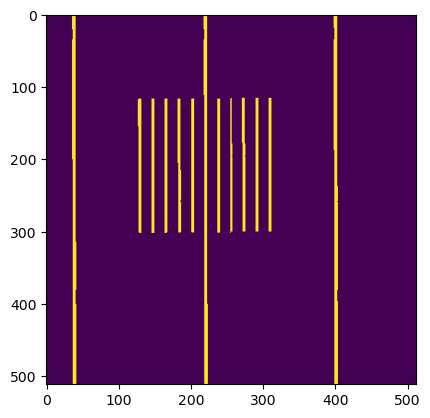

In [72]:
plt.imshow(vertical)

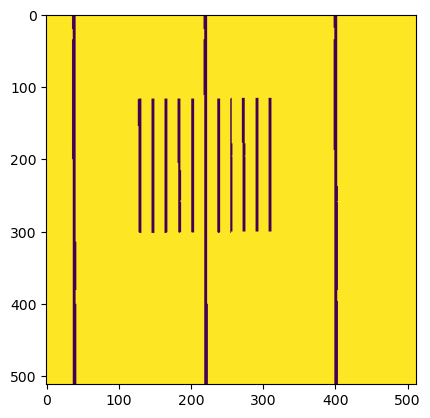

In [73]:
#smoothing of vertical image...why doesn't it also apply this to the horizontal? 
vertical = cv.bitwise_not(vertical)
plt.imshow(vertical)

In [74]:
#Is one (binary threshold vs inverse) inherently better than the other?
'''edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 3, -2)
plt.imshow(edges)'''

'edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 3, -2)\nplt.imshow(edges)'

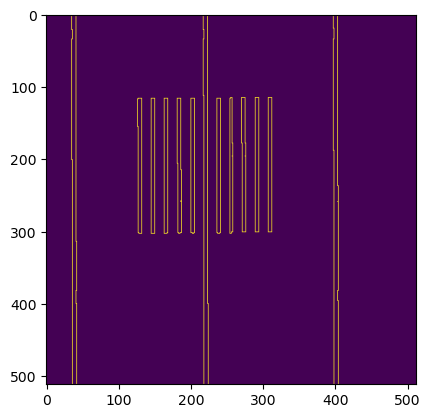

In [75]:
edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 3, -2)
plt.imshow(edges)

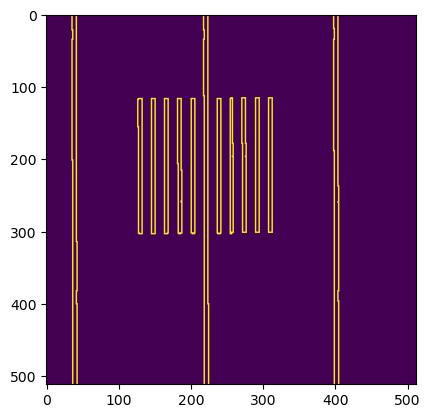

In [76]:
kernel = np.ones((2,2),np.uint8)
edges = cv.dilate(edges, kernel)
plt.imshow(edges)

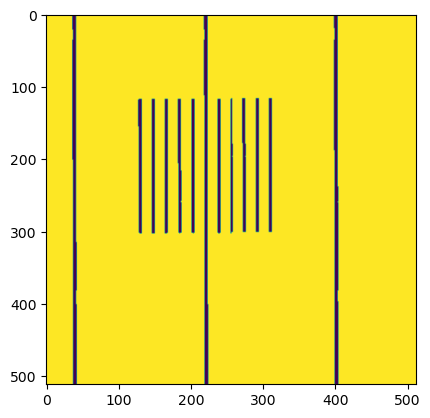

In [77]:
smooth = np.copy(vertical)
smooth = cv.blur(smooth, (2,2))
plt.imshow(smooth)

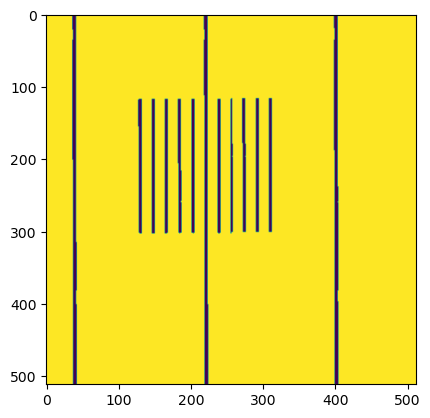

In [78]:
(rows,cols) = np.where(edges != 0)
vertical [rows,cols] = smooth[rows, cols]

plt.imshow(vertical)